1. **Данные**

In [24]:
import numpy as np
from scipy.signal import correlate
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from l2cm import l2cm_code  # Импорт генерации L2CM
from l2cl import l2cl_code  # Импорт генерации L2CL

In [25]:
# Параметры сигнала GPS L2C
N_oscil_fs  = 1          # Количество колебаний несущей на один чип
num_points_per_chip = 10 # Количество точек на один чип

fs = 511500             # Чиповая скорость L2C в Гц
chip_rate_l2c = 2 * fs  # Чиповая скорость L2C в Гц для мультиплексированого сигнала

number_repet = 75 # Длина: 10230 * 75 = 767250

T_cm = 20e-3 # Длительность всего L2 CM-кода в секундах
T_cl = 1.5   # Длительность всего L2 CL-кода в секундах

kol_ch_cm = 10230  # Количество чипов в L2 CM
kol_ch_cl = 767250 # Количество чипов в L2 CL

T_1chip = T_cm / kol_ch_cm  # Время одного чипа L2 

N_display = 20                                     # Количество чипов для показа на графике 
T_N_display = N_display * T_1chip                  # Длительность чипов для отображения 
display_samples = N_display * num_points_per_chip  # Число точек для вывода

In [26]:
print(kol_ch_cl/kol_ch_cm)


75.0


2. **Генерация ПСП для разных НКА**

2.1 **выбор НКА**

In [27]:
# Выбор PRN номера для генерации кода
PRN1 = 1  
PRN2 = 5
PRN3 = 7

2.2 **Генерация PRN-кодов L2 CM и L2 CL**

In [28]:
# Генерация PRN-кодов L2 CM 
L2_CM_code = l2cm_code(PRN1)  # Весь период ПСП 
L2_CM_code = np.repeat(L2_CM_code, num_points_per_chip) * 2 - 1  # Преобразование в ±1 и ресемплинг
L2_CM_code1 = l2cm_code(PRN1) * 2 - 1 # Весь период ПСП 
L2_CM_code2 = l2cm_code(PRN2) * 2 - 1 # Весь период ПСП 
L2_CM_code3 = l2cm_code(PRN3) * 2 - 1 # Весь период ПСП 

# Генерация PRN-кодов L2 CL
L2_CL_code = l2cl_code(PRN1)  # Весь период ПСП
L2_CL_code = np.repeat(L2_CL_code, num_points_per_chip) * 2 - 1  # Преобразование в ±1 и ресемплинг
L2_CL_code1 = l2cl_code(PRN1) * 2 - 1 # Весь период ПСП 
L2_CL_code2 = l2cl_code(PRN2) * 2 - 1 # Весь период ПСП 
L2_CL_code3 = l2cl_code(PRN3) * 2 - 1 # Весь период ПСП 

2.3 **Создание временной оси**

In [29]:
# Создание временной оси
t_cm_res = np.linspace(0, T_cm, len(L2_CM_code))
t_cl_res = np.linspace(0, T_cl, len(L2_CL_code))

t_cm1 = np.linspace(0, T_cm, len(L2_CM_code1))
t_cm2 = np.linspace(0, T_cm, len(L2_CM_code2))
t_cm3 = np.linspace(0, T_cm, len(L2_CM_code3))

t_cl1 = np.linspace(0, T_cm, len(L2_CL_code1))
t_cl2 = np.linspace(0, T_cm, len(L2_CL_code2))
t_cl3 = np.linspace(0, T_cm, len(L2_CL_code3))



2.4 **Визуализация ПСП для разных НКА**

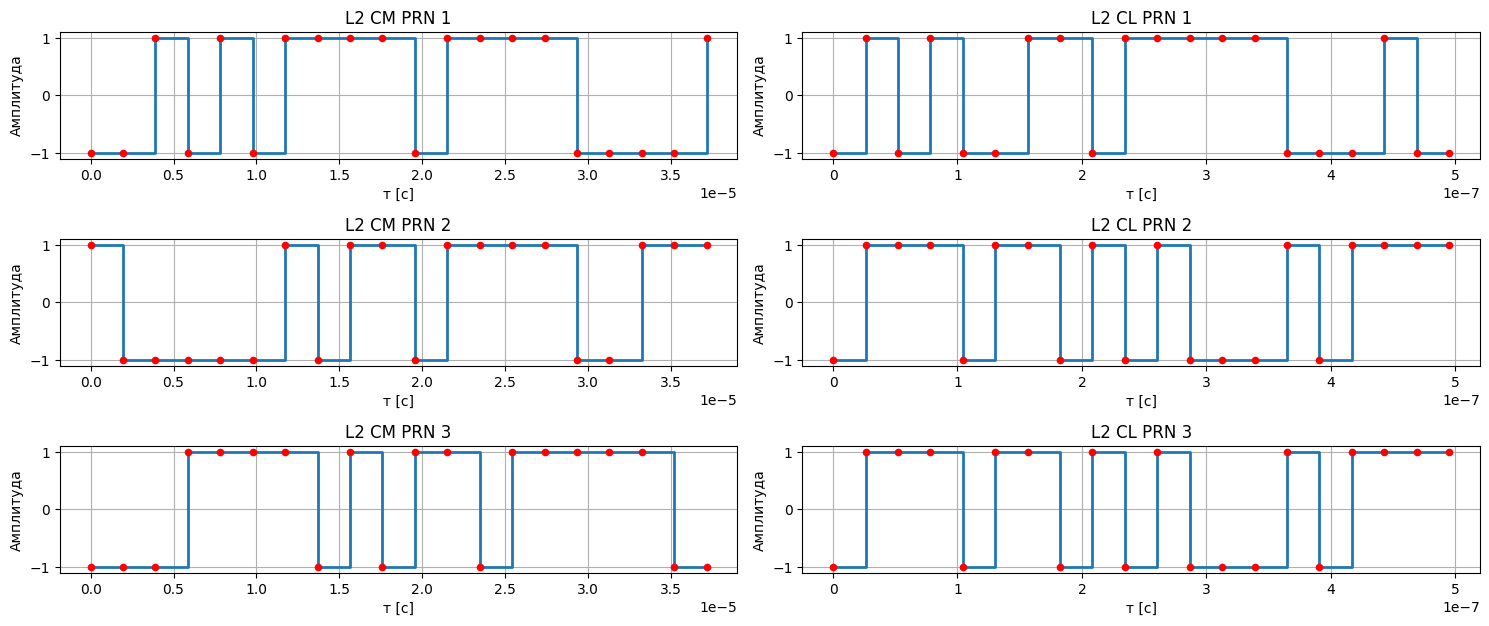

In [30]:
plt.figure(figsize=(15, 8))

plt.subplot(4, 2, 1)
plt.plot(t_cm1[:N_display], L2_CM_code1[:N_display], drawstyle='steps-post', linewidth=2)
plt.scatter(t_cm1[:N_display], L2_CM_code1[:N_display], color='red', marker='o', s=20, zorder=3)
plt.title("L2 CM PRN 1")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(t_cl1[:N_display], L2_CL_code1[:N_display], drawstyle='steps-post', linewidth=2)
plt.scatter(t_cl1[:N_display], L2_CL_code1[:N_display], color='red', marker='o', s=20, zorder=3)
plt.title("L2 CL PRN 1")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.grid()

plt.subplot(4, 2, 3)
plt.plot(t_cm2[:N_display], L2_CM_code2[:N_display], drawstyle='steps-post', linewidth=2)
plt.scatter(t_cm2[:N_display], L2_CM_code2[:N_display], color='red', marker='o', s=20, zorder=3)
plt.title("L2 CM PRN 2")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(t_cl2[:N_display], L2_CL_code3[:N_display], drawstyle='steps-post', linewidth=2)
plt.scatter(t_cl2[:N_display], L2_CL_code3[:N_display], color='red', marker='o', s=20, zorder=3)
plt.title("L2 CL PRN 2")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.grid()

plt.subplot(4, 2, 5)
plt.plot(t_cm3[:N_display], L2_CM_code3[:N_display], drawstyle='steps-post', linewidth=2)
plt.scatter(t_cm3[:N_display], L2_CM_code3[:N_display], color='red', marker='o', s=20, zorder=3)
plt.title("L2 CM PRN 3")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(t_cl3[:N_display], L2_CL_code3[:N_display], drawstyle='steps-post', linewidth=2)
plt.scatter(t_cl3[:N_display], L2_CL_code3[:N_display], color='red', marker='o', s=20, zorder=3)
plt.title("L2 CL PRN 3")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.grid()

plt.tight_layout()
plt.show()

3. **Функция для расчета АКФ и ВКФ**

In [31]:
# Функция для вычисления АКФ
def autocorrelation(x):
    n = len(x)
    correlation = correlate(x, x, mode='full')
    correlation = correlation / np.max(correlation)  # Нормализация на пик
    shifts = np.arange(-n + 1, n)  # Сдвиги в отсчётах
    return shifts, correlation


# Функция для вычисления ВКФ
def crosscorrelation(x, y):
    n = len(x)
    shifts = np.arange(-n + 1, n)
    correlation = correlate(x, y, mode='full') / n
    return shifts, correlation


# Расчет АКФ и ВКФ
shifts1, acf_cm = crosscorrelation(L2_CM_code1, L2_CM_code1)
shifts2, acf_cl = crosscorrelation(L2_CL_code1, L2_CL_code1)

shifts3, acf_cm_resampled = autocorrelation(L2_CM_code)  # С ресемплингом
shifts4, acf_cl_resampled = autocorrelation(L2_CL_code)  # С ресемплингом


shifts1, vcf_cm_1_2 = crosscorrelation(L2_CM_code1, L2_CM_code2)
shifts1, vcf_cm_2_3 = crosscorrelation(L2_CM_code2, L2_CM_code3)
shifts1, vcf_cm_1_3 = crosscorrelation(L2_CM_code1, L2_CM_code3)

shifts2, vcf_cl_1_2 = crosscorrelation(L2_CL_code1, L2_CL_code2)
shifts2, vcf_cl_2_3 = crosscorrelation(L2_CL_code2, L2_CL_code3)
shifts2, vcf_cl_1_3 = crosscorrelation(L2_CL_code1, L2_CL_code3)


3.1 **Визуализация АКФ и ВКФ для кода CM**

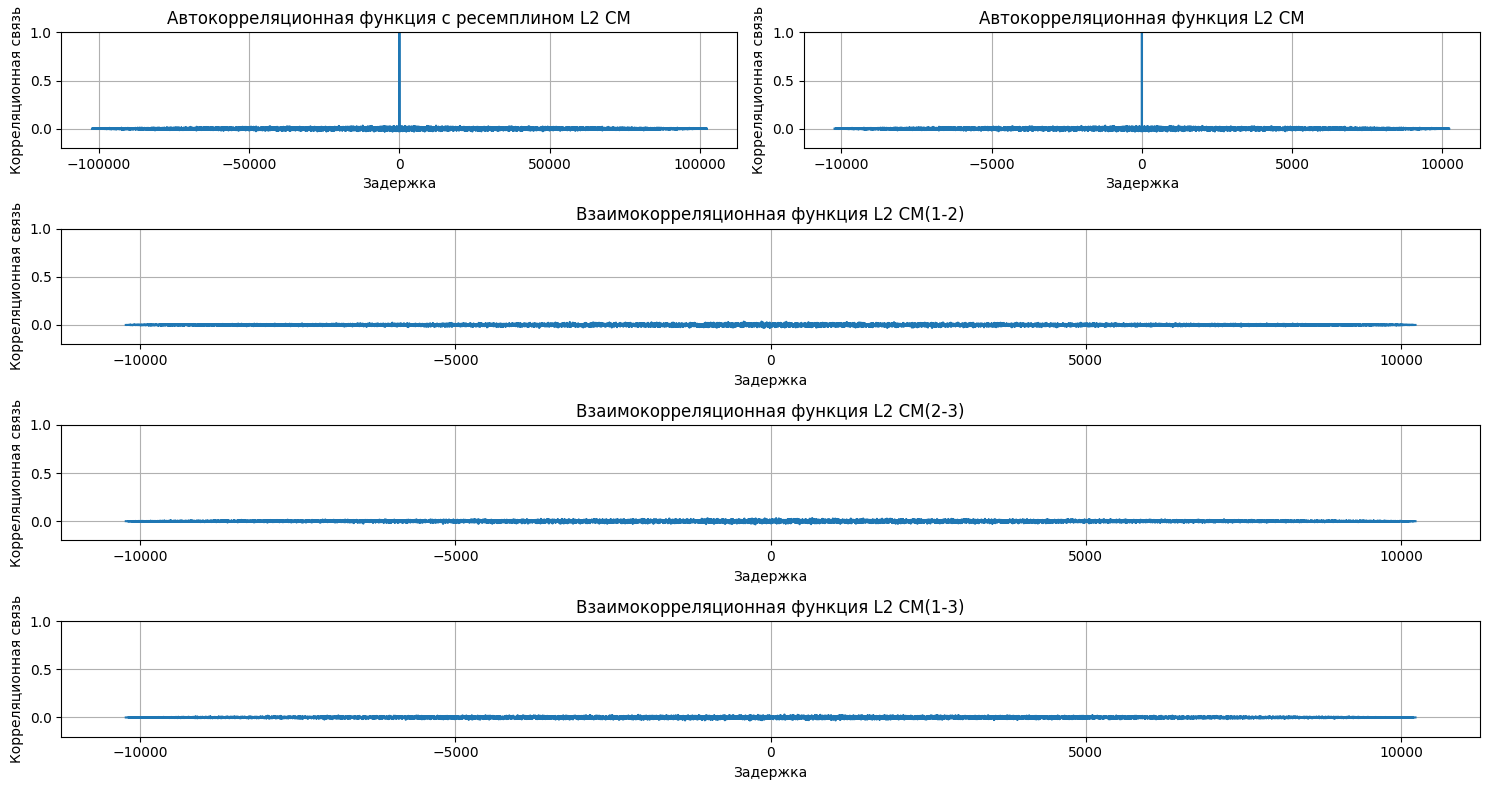

In [32]:
# Визуализация АКФ и ВКФ для кода CM
plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(4, 2, height_ratios=[1, 1, 1, 1])  

# Первая строка - два графика 
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

# Остальные строки - по одному графику на всю ширину
ax3 = plt.subplot(gs[1, :])
ax4 = plt.subplot(gs[2, :])
ax5 = plt.subplot(gs[3, :])

# Заполнение графиков данными
ax1.plot(shifts3, acf_cm_resampled)
ax1.set_ylim(-0.2, 1)
ax1.set_title("Автокорреляционная функция c ресемплином L2 CM")
ax1.set_xlabel("Задержка")
ax1.set_ylabel("Корреляционная связь")
ax1.grid()

ax2.plot(shifts1, acf_cm)
ax2.set_ylim(-0.2, 1)
ax2.set_title("Автокорреляционная функция L2 CM")
ax2.set_xlabel("Задержка")
ax2.set_ylabel("Корреляционная связь")
ax2.grid()

ax3.plot(shifts1, vcf_cm_1_2)
ax3.set_ylim(-0.2, 1)
ax3.set_title("Взаимокорреляционная функция L2 CM(1-2)")
ax3.set_xlabel("Задержка")
ax3.set_ylabel("Корреляционная связь")
ax3.grid()

ax4.plot(shifts1, vcf_cm_2_3)
ax4.set_ylim(-0.2, 1)
ax4.set_title("Взаимокорреляционная функция L2 CM(2-3)")
ax4.set_xlabel("Задержка")
ax4.set_ylabel("Корреляционная связь")
ax4.grid()

ax5.plot(shifts1, vcf_cm_1_3)
ax5.set_ylim(-0.2, 1)
ax5.set_title("Взаимокорреляционная функция L2 CM(1-3)")
ax5.set_xlabel("Задержка")
ax5.set_ylabel("Корреляционная связь")
ax5.grid()

plt.tight_layout()
plt.show()

3.2 **Визуализация АКФ и ВКФ для кода CL**

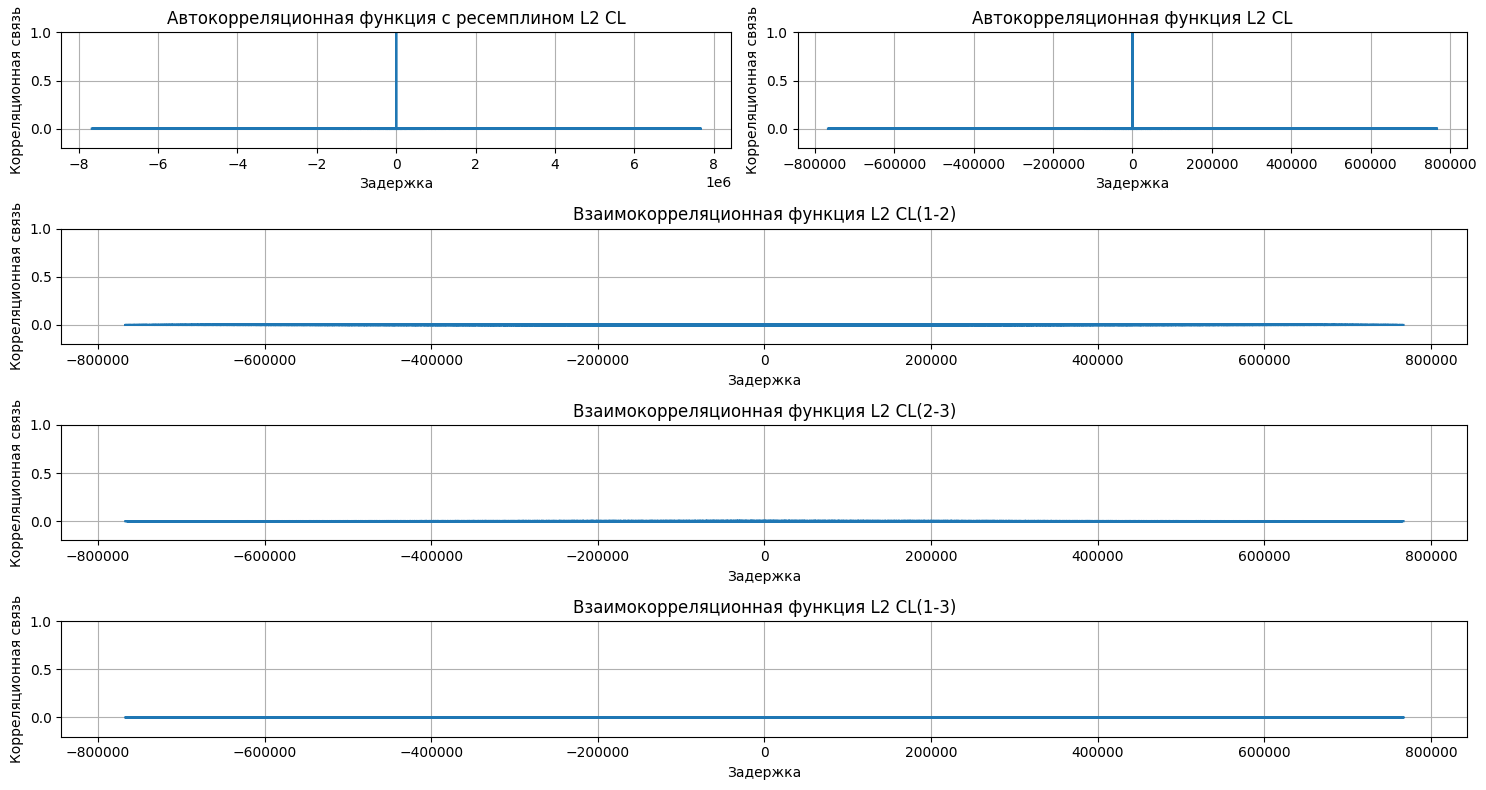

In [33]:
# Визуализация АКФ и ВКФ для кода CL
plt.figure(figsize=(15, 8))  # Размер фигуры
gs = gridspec.GridSpec(4, 2, height_ratios=[1, 1, 1, 1]) 

# Первая строка - два графика 
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

# Остальные строки - по одному графику на всю ширину
ax3 = plt.subplot(gs[1, :])
ax4 = plt.subplot(gs[2, :])
ax5 = plt.subplot(gs[3, :])

# Заполнение графиков данными
ax1.plot(shifts4, acf_cl_resampled)
ax1.set_ylim(-0.2, 1)
ax1.set_title("Автокорреляционная функция c ресемплином L2 CL")
ax1.set_xlabel("Задержка")
ax1.set_ylabel("Корреляционная связь")
ax1.grid()

ax2.plot(shifts2, acf_cl)
ax2.set_ylim(-0.2, 1)
ax2.set_title("Автокорреляционная функция L2 CL")
ax2.set_xlabel("Задержка")
ax2.set_ylabel("Корреляционная связь")
ax2.grid()

ax3.plot(shifts2, vcf_cl_1_2)
ax3.set_ylim(-0.2, 1)
ax3.set_title("Взаимокорреляционная функция L2 CL(1-2)")
ax3.set_xlabel("Задержка")
ax3.set_ylabel("Корреляционная связь")
ax3.grid()

ax4.plot(shifts2, vcf_cl_2_3)
ax4.set_ylim(-0.2, 1)
ax4.set_title("Взаимокорреляционная функция L2 CL(2-3)")
ax4.set_xlabel("Задержка")
ax4.set_ylabel("Корреляционная связь")
ax4.grid()

ax5.plot(shifts2, vcf_cl_1_3)
ax5.set_ylim(-0.2, 1)
ax5.set_title("Взаимокорреляционная функция L2 CL(1-3)")
ax5.set_xlabel("Задержка")
ax5.set_ylabel("Корреляционная связь")
ax5.grid()

plt.tight_layout()
plt.show()

4. **Построение ПСП, заполнение несущей**

In [34]:
# Генерация синусоидального сигнала
carrier_freq_cm = fs * N_oscil_fs # Новая частота несущей L2 CM
carrier_freq_cl = fs * N_oscil_fs # Новая частота несущей L2 CL

carrier_wave_cm = np.sin(2 * np.pi * carrier_freq_cm * t_cm_res)
carrier_wave_cl = np.sin(2 * np.pi * carrier_freq_cl * t_cl_res)

# Модулированные сигналы (BPSK)
modulated_wave_cm = carrier_wave_cm * L2_CM_code
modulated_wave_cl = carrier_wave_cl * L2_CL_code

5. **Функци для расчета СПМ**

In [35]:
# Вычисляем СПМ через БПФ АКФ
spm_cm = np.abs(fft(acf_cm_resampled))    # Модуль для неотрицательности
freqs_cm = fftfreq(len(shifts3), d=1/fs)  # Частотная ось (Гц)

# Нормировка СПМ на максимальное значение
spm_cm_normalized = spm_cm / np.max(spm_cm)



# Вычисляем СПМ через БПФ АКФ
spm_cl = np.abs(fft(acf_cl_resampled))    # Модуль для неотрицательности
freqs_cl = fftfreq(len(shifts4), d=1/fs)  # Частотная ось (Гц)

# Нормировка СПМ на максимальное значение
spm_cl_normalized = spm_cl / np.max(spm_cl)

6. **Визуализация для кодов L2 CM и CL**

6.1 **Визуализация для кодa L2 CM**

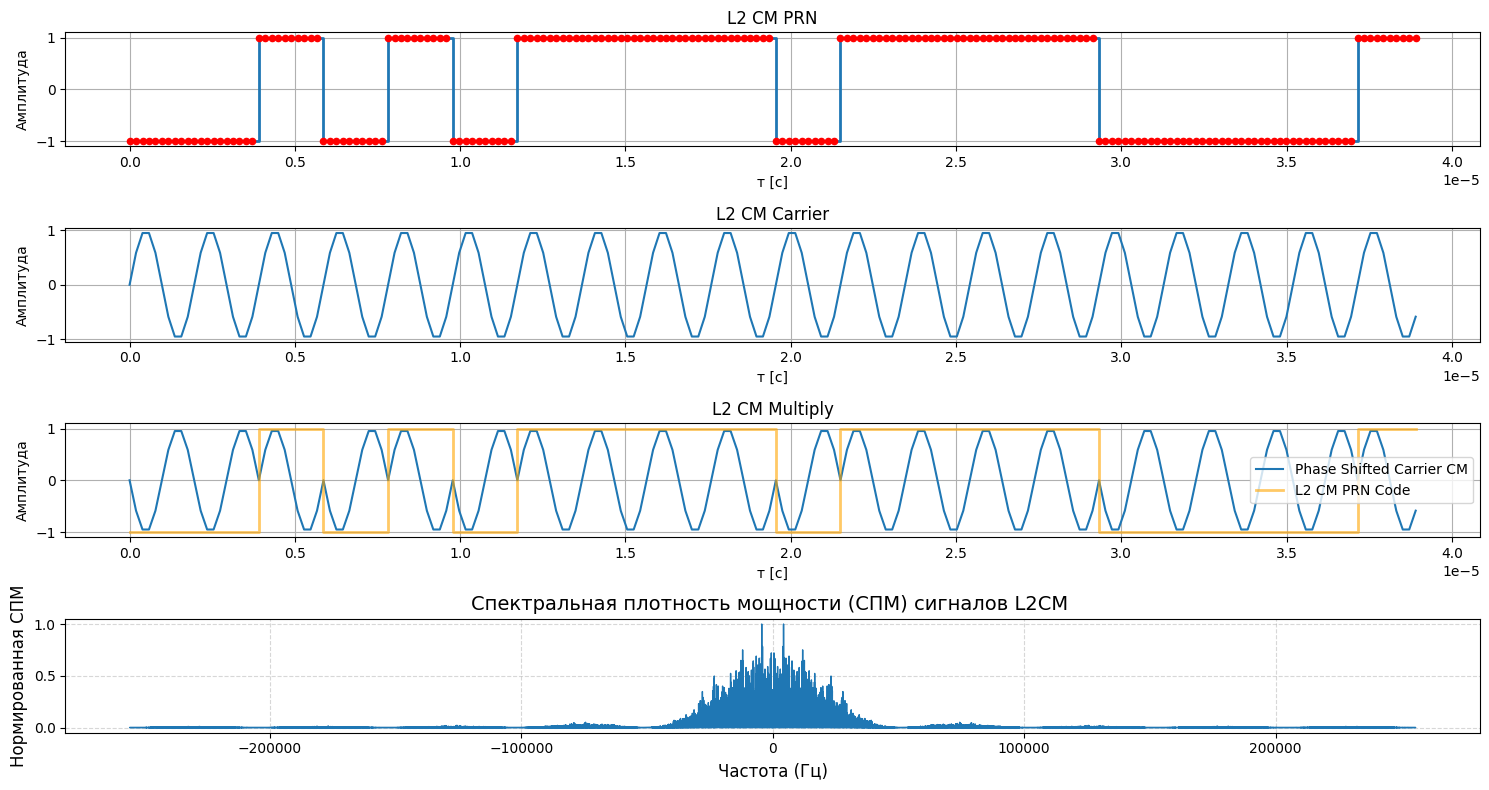

In [36]:
plt.figure(figsize=(15, 8))

plt.subplot(4, 1, 1)
plt.plot(t_cm_res[:display_samples], L2_CM_code[:display_samples], drawstyle='steps-post', linewidth=2)
plt.scatter(t_cm_res[:display_samples], L2_CM_code[:display_samples], color='red', marker='o', s=20, zorder=3)
plt.title("L2 CM PRN")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(t_cm_res[:display_samples], carrier_wave_cm[:display_samples])
plt.title("L2 CM Carrier")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(t_cm_res[:display_samples], modulated_wave_cm[:display_samples], label="Phase Shifted Carrier CM")
plt.plot(t_cm_res[:display_samples], L2_CM_code[:display_samples], drawstyle='steps-post', color='orange', alpha=0.6, linewidth=2, label="L2 CM PRN Code")
plt.title("L2 CM Multiply")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(freqs_cm , spm_cm_normalized, linewidth=1)  
plt.xlabel("Частота (Гц)", fontsize=12)
plt.ylabel("Нормированная СПМ", fontsize=12)
plt.title("Спектральная плотность мощности (СПМ) сигналов L2CM ", fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

6.2 **Визуализация для кодa L2 CL**

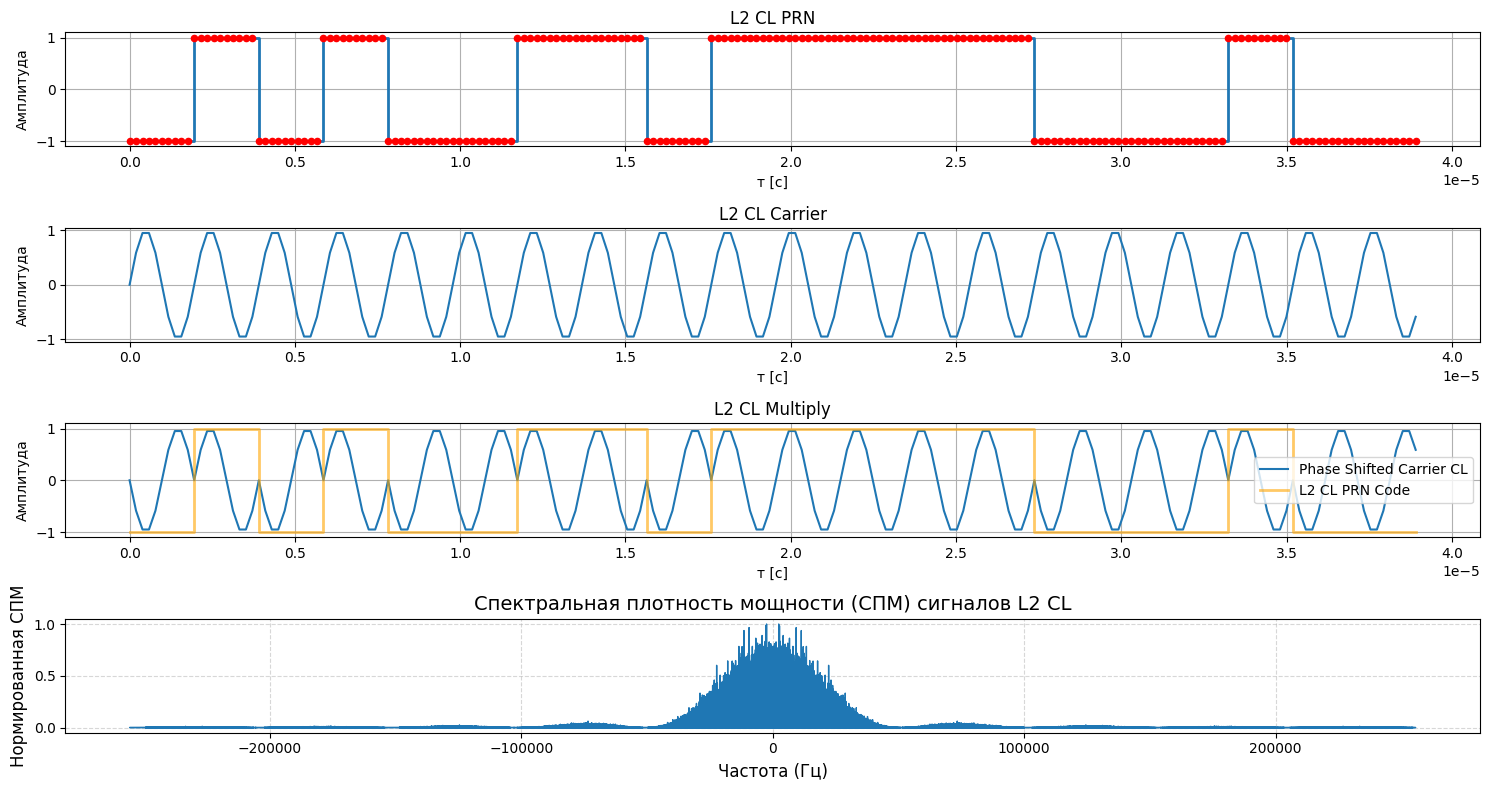

In [37]:
plt.figure(figsize=(15, 8))

plt.subplot(4, 1, 1)
plt.plot(t_cl_res[:display_samples], L2_CL_code[:display_samples], drawstyle='steps-post', linewidth=2)
plt.scatter(t_cl_res[:display_samples], L2_CL_code[:display_samples], color='red', marker='o', s=20, zorder=3)
plt.title("L2 CL PRN")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(t_cl_res[:display_samples], carrier_wave_cl[:display_samples])
plt.title("L2 CL Carrier")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(t_cl_res[:display_samples], modulated_wave_cl[:display_samples], label="Phase Shifted Carrier CL")
plt.plot(t_cl_res[:display_samples], L2_CL_code[:display_samples], drawstyle='steps-post', color='orange', alpha=0.6, linewidth=2, label="L2 CL PRN Code")
plt.title("L2 CL Multiply")
plt.xlabel("т [c]")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(freqs_cl , spm_cl_normalized, linewidth=1)  
plt.xlabel("Частота (Гц)", fontsize=12)
plt.ylabel("Нормированная СПМ", fontsize=12)
plt.title("Спектральная плотность мощности (СПМ) сигналов L2 CL", fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

7. **Мультиплексирование кода L2C**

In [38]:
# Повторяем CM-код 75 раз
cm_repeated = np.tile(L2_CM_code1, number_repet)  # Длина: 10230 * 75 = 767250
cl_trimmed = L2_CL_code1[:kol_ch_cl]    # Длина: 767250

# Мультиплексирование (CM[0], CL[0], CM[1], CL[1], ...)
N = len(cm_repeated) * 2  # Так как мы будем чередовать
l2c_signal = np.empty(N, dtype=int)
l2c_signal[0::2] = cm_repeated
l2c_signal[1::2] = cl_trimmed

# Временная ось
time_us_cmcl = np.arange(kol_ch_cl) * chip_rate_l2c
time_us_l2c = np.repeat(np.arange(N) * chip_rate_l2c, 2)
l2c_steps = np.repeat(l2c_signal, 2)

7.1 **Визуализация для мультиплексированого кода L2C**

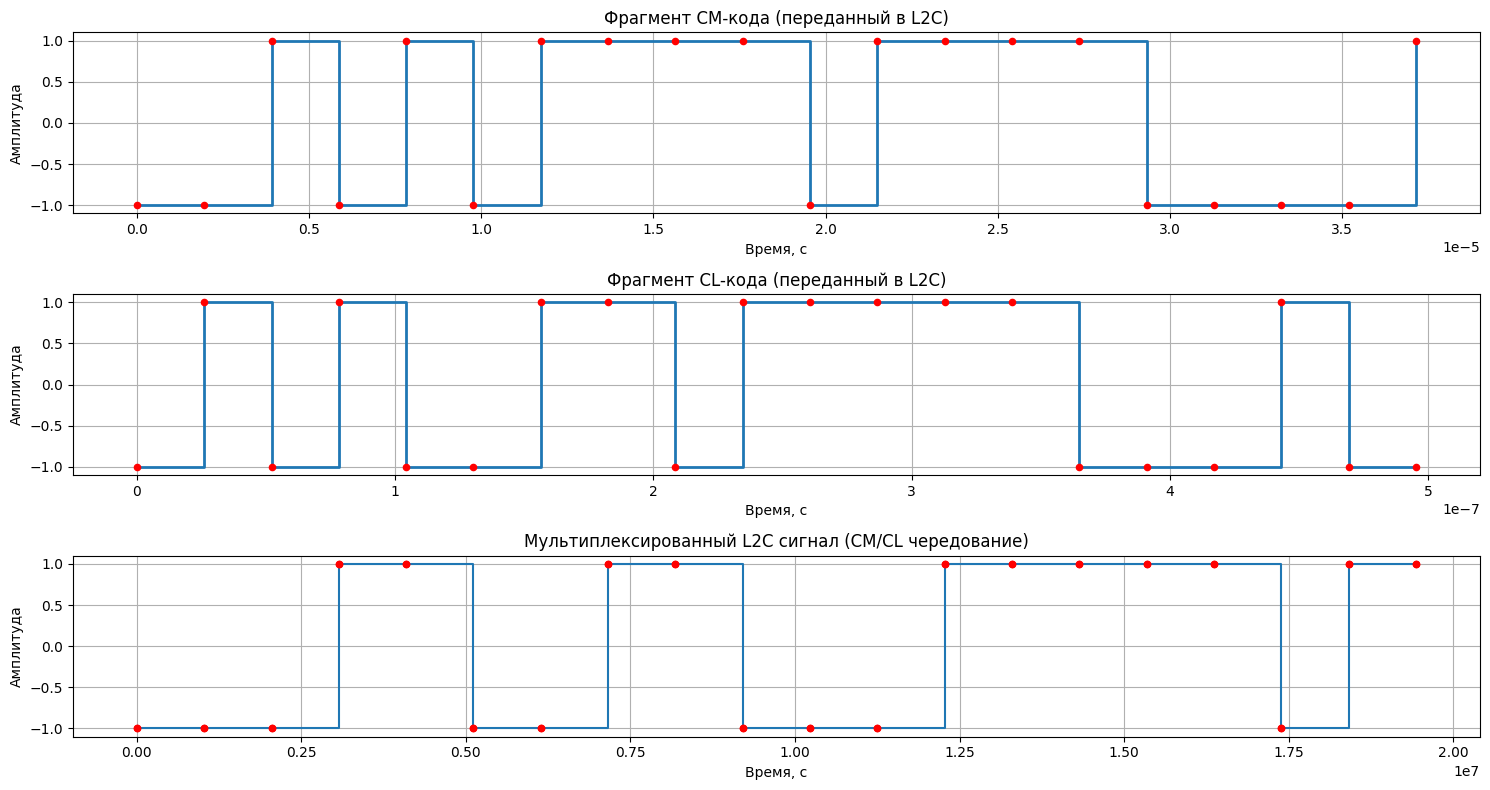

In [39]:
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(t_cm1[:N_display], L2_CM_code1[:N_display], drawstyle='steps-post', linewidth=2)
plt.scatter(t_cm1[:N_display], L2_CM_code1[:N_display], color='red', marker='o', s=20, zorder=3)
plt.title("Фрагмент CM-кода (переданный в L2C)")
plt.ylabel("Амплитуда")
plt.xlabel("Время, с")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t_cl1[:N_display], L2_CL_code1[:N_display], drawstyle='steps-post', linewidth=2)
plt.scatter(t_cl1[:N_display], L2_CL_code1[:N_display], color='red', marker='o', s=20, zorder=3)
plt.title("Фрагмент CL-кода (переданный в L2C)")
plt.ylabel("Амплитуда")
plt.xlabel("Время, с")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(time_us_l2c[:2*N_display], l2c_steps[:2*N_display], drawstyle='steps-post')
plt.scatter(time_us_l2c[:2*N_display], l2c_steps[:2*N_display], color='red', marker='o', s=20, zorder=3)
plt.title("Мультиплексированный L2C сигнал (CM/CL чередование)")
plt.xlabel("Время, с")
plt.ylabel("Амплитуда")
plt.grid(True)

plt.tight_layout()
plt.show()

8. **Формирование комплексного IQ-сигнала**

In [40]:
# Преобразуем в float32 и нормализуем
l2c_signal = l2c_signal.astype(np.float32)
l2c_signal /= np.max(np.abs(l2c_signal))

# Создаем I и Q составляющие (Q = 0 для BPSK)
I = l2c_signal
Q = np.zeros_like(I)
iq_signal = I + 1j * Q

# Временная ось (в секундах)
t = np.arange(len(iq_signal)) / chip_rate_l2c

8.1 **Визуализация для комплексного IQ-сигнала**

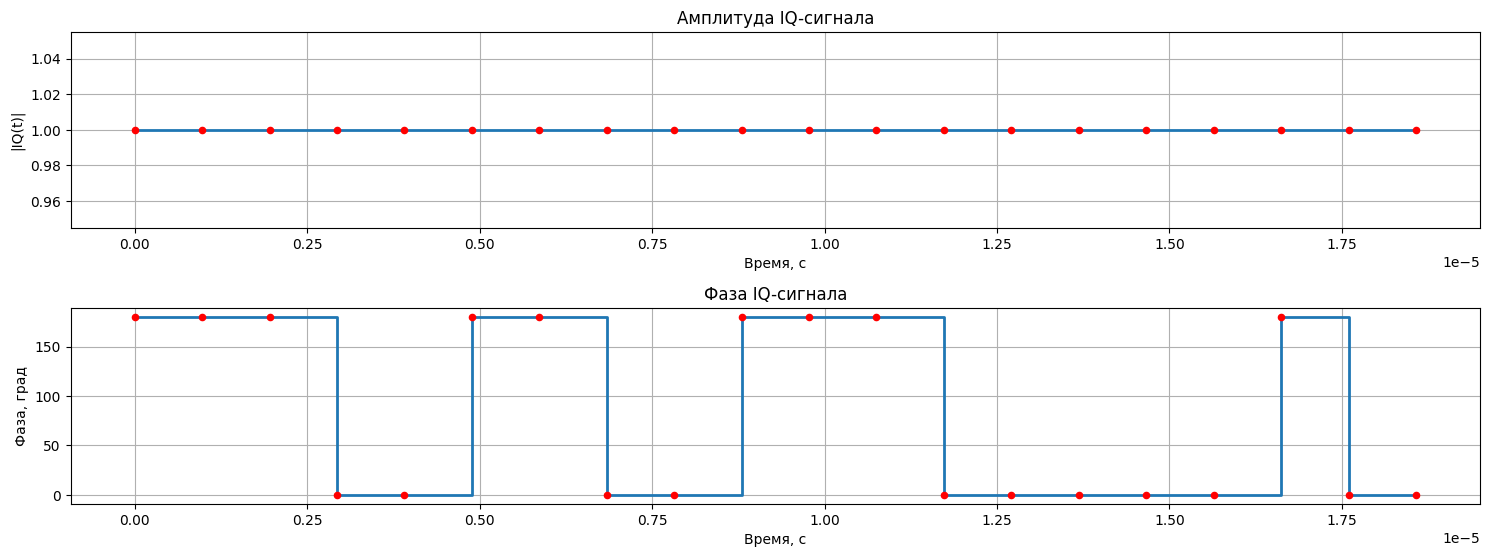

In [41]:
# --- Амплитуда сигнала ---
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(t[:N_display], np.abs(iq_signal[:N_display]),drawstyle='steps-post', linewidth=2)
plt.scatter(t[:N_display], np.abs(iq_signal[:N_display]), color='red', marker='o', s=20, zorder=3)
plt.title("Амплитуда IQ-сигнала")
plt.xlabel("Время, с")
plt.ylabel("|IQ(t)|")
plt.grid()

# --- Фаза сигнала ---
plt.subplot(3, 1, 2)
plt.plot(t[:N_display], np.degrees(np.angle(iq_signal[:N_display])), drawstyle='steps-post', linewidth=2)
plt.scatter(t[:N_display], np.degrees(np.angle(iq_signal[:N_display])), color='red', marker='o', s=20, zorder=3)
plt.title("Фаза IQ-сигнала")
plt.xlabel("Время, с")
plt.ylabel("Фаза, град")
plt.grid()

plt.tight_layout()
plt.show()

8.2 **Запись IQ-сигнала в бинарный файл**

In [42]:
# #  Запись IQ-сигнала в бинарный файл ===

# # Интерливинг: [I0, Q0, I1, Q1, ...]
# interleaved = np.empty(2 * len(iq_signal), dtype=np.float32)
# interleaved[0::2] = iq_signal.real
# interleaved[1::2] = iq_signal.imag

# # Сохраняем в файл
# with open("l2c_iq_signal.bin", "wb") as f:
#     interleaved.tofile(f)

# print("Файл 'l2c_iq_signal.bin' успешно записан.")